# Segunda versión del entrenamiento de modelo de los jóvenes (Autoinforme)

En esta segunda versión del entrenamiento de los modelos se ha utilizado datasets generados a través de ChatGPT, utilzando el modelo GPT 4o, ya que es la última versión disponible de OpenAI. Se utilizará datasets generados para el modelo de las familias y los profesionales.

Los datasets del Autoinforme para el modelo de los jóvenes se encuentran en la carpeta **datasets/autofinforme/v2/**. Preferí mantener este nuevo conjunto de datasets separados de la primera versión para tener una mayor distinción. Al ser datasets generados de forma artificial, no contiene datos de personas reales, por lo que no hay problema en publicar el contenido de dichos datasets.

* Autoinforme: **datasets/autoinforme/v2/**

Como el clasificador sólo entiende tipos numéricos, todos los valores de los datasets deben ser codificados a valores númericos. Una opción era utilizar el LabelEncoder, de scikitlearn, pero el problema es que asigna números arbitrarios a las categorías sin asignar ningún tipo de orden, además de que puede dar fallos cuando se quiere añadir valores a las categorías nuevas.

Es por ello que opte por realizar una decodificación propia de forma manual, utilizando una serie de valores establecidos que es el siguiente:


In [6]:
BAYES_NETWORK_STATE_NAMES_NEW_VERSION = {
    'Curso':['PRIMARIA', 'ESO', 'BACHILLERATO', 'UNIVERSIDAD', 'FORMACION PROFESIONAL', 'NINGUNO'], 
    'Sexo asignado':['HOMBRE', 'MUJER', 'OTRO'], 
    'Transgenero':['SI','NO','NO ESTOY SEGURO DE SER TRANS', 'NO ESTOY SEGURO DE LO QUE SE PREGUNTA'], 
    'Edad':['MENOR DE 12', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', 'MAYOR DE 21'], 
    'Situacion laboral padre':['NO TRABAJA', 'TRABAJA', 'PENSIONADO'], 
    'Situacion laboral madre': ['NO TRABAJA', 'TRABAJA', 'PENSIONADO'], 
    'Nivel profesional padre':['NINGUNO', 'PRIMARIA', 'ESO', 'BACHILLERATO', 'UNIVERSIDAD', 'FORMACION PROFESIONAL', 'LICENCIATURA'], 
    'Nivel profesional madre':['NINGUNO', 'PRIMARIA', 'ESO', 'BACHILLERATO', 'UNIVERSIDAD', 'FORMACION PROFESIONAL', 'LICENCIATURA'],
    'Nivel promedio del rendimiento academico':['INSUFICIENTE', 'SUFICIENTE', 'NOTABLE', 'SOBRESALIENTE', 'EXTRAORDINARIO'],
    'Nivel de autopercepcion masculina':['0','1','2','3','4','5','6'],
    'Nivel de autopercepcion femenina':['0','1','2','3','4','5','6'],
    'Nivel de percepcion masculina externa':['0','1','2','3','4','5','6'],
    'Nivel de percepcion femenina externa':['0','1','2','3','4','5','6'],
    'Altura':['MENOS DE 149', '150-159', '160-169','170-179','180-189','MAS DE 190'],
    'Peso':['MENOS DE 49', '50-59', '60-69','70-79','80-89','MAS DE 90'],
    'Tratamiento psiquiatrico previo':['SI','NO'],
    'Presenta enfermedad cronica':['SI','NO'],
    'Bullying victima':['SI','NO'],
    'Bullying perpetrador':['SI','NO'],
    'Cyberbullying victima':['SI','NO'],
    'Cyberbullying perpetrador':['SI','NO'],
    'Adiccion/abuso alcohol':['SI','NO'],
    'Adiccion/abuso sustancias':['SI','NO'],
    'Adiccion/abuso Internet':['SI','NO'],
    'Problemas interiorizados':['SI','NO'],
    'Problemas exteriorizados':['SI','NO'],
    'Problemas de contexto':['SI','NO'],
    'Problemas recursos psicologicos':['SI','NO'],
    'Percepcion de discriminacion':['SI','NO'],
    'Fuente de discriminacion':['NINGUNO', 'EDAD', 'RAZA', 'DISCAPACIDAD', 'GENERO', 'ORIENTACION SEXUAL', 'RELIGION'],
    'Nivel de resistencia/resiliencia':['1','2','3','4','5'],
    'Nivel de regulacion positiva':['1','2','3','4','5'],
    'Nivel de regulacion negativa':['1','2','3','4','5'],
    'Atrapamiento interno':['SI','NO'],
    'Atrapamiento externo':['SI','NO'],
    'Nivel percibido de derrota o fracaso':['BAJO','MEDIO', 'ALTO'],
    'Sentido de pertenencia frustada':['SI','NO'],
    'Percepcion de ser una carga':['SI','NO'],
    'Autoeficiencia para el suicidio':['SI', 'NO'],
    'Madre adolescente':['SI', 'NO'],
    'Padre adolescente':['SI', 'NO'],
    'Padres divorciados':['SI', 'NO'],
    'Familia monoparental':['SI', 'NO'],
    'Tratamiento psicologico padre/madre':['SI', 'NO'],
    'Adiccion padre/madre':['SI', 'NO'],
    'Relaciones conflictivas hijo-padre/madre':['SI', 'NO'],
    'Familia reconstruida':['SI', 'NO'],
    'Busqueda informacion autolesion':['SI', 'NO'],
    'Compartir en RRSS pensamiento autolesion':['SI', 'NO'],
    'Peticion ayuda en Internet':['SI', 'NO'],
    'Realizacion autolesion despues de ver contenido':['SI', 'NO'], 
    'Conocidos que comparten autolesion en Internet':['SI', 'NO'],
    'Contacto informacion autolesion':['SI', 'NO'],
    'Denuncia autolesion Internet':['SI', 'NO'],
    'Aceptacion/rechazo parental':['ACEPTACION', 'RECHAZO'],
    'Control parental':['SI', 'NO'],
    'Situacion economica familiar precaria':['SI', 'NO'],
    'Estudios de la madre':['SI', 'NO'],
    'Estudios del padre':['SI', 'NO'],
    'Supervision parental insuficiente':['SI', 'NO'],
    'Maltrato al adolescente':['SI', 'NO'],
    'Duelo':['SI', 'NO'],
    'Ingreso familiar mensual':['MENOS DE 499', '500-999','1000-1499','2000-2499','MAS DE 2500'],
    'Desenlace':['NINGUNO','AUTOLESION','COMUNICACION', 'DESEO','IDEACION','PLANIFICACION','INTENCION']
}

# Parámetros de entrenamiento

Para empezar, establecemos los siguientes parámetros del entrenamiento:
* _test_size_:indica el tipo de división que tendrá el dataset. Por ejemplo, si test_size = 0.3, el 70% del dataset se utilizará para el entrenamiento del modelo, mientras que el 30% se usará para el testeo.
* _average_: parámetro que especifica cómo se calcularán las métricas de la prueba del rendimiento. Puede tener los valores weighted y micro. _micro_ calcula la métrica global a través de todas las clases, sin tener en cuenta la distribución de clases. Por lo tanto, los resultados de accuracy, precision, recally f1_score tendrán el mismo resultado. _weighted_ sí tiene en cuenta la distribución de todas las clases, en este caso, de las clases NINGUNO,AUTOLESION,COMUNICACION, DESEO,IDEACION,PLANIFICACION e INTENCION. Calcula la métrica de cada clase y luego la pondera según el número de instancias reales en cada clase. 


In [7]:
# Establecer nombre del dataset y el tipo de modelo para las pruebas
# Posibles valores: autoinforme, familia o profesional
datasetName = 'dataset_v2_2.csv'
test_size = 0.3
average = 'micro'

# Preparación del dataframe
A continuación, cargamos el respectivo dataframe de la carpeta especificada.

Extraemos toda la información del dataset y lo guardamos en un dataframe de la librería *Pandas*. El contenido del dataframe es el siguiente:

In [8]:
import pandas as pd
df = pd.read_csv('../datasets/autoinforme/v2/' + datasetName)

df

,Index,Edad,Curso,Peso,Altura,Sexo asignado,Transgenero,Nivel promedio del rendimiento academico,Situacion laboral madre,Situacion laboral padre,...,Relaciones conflictivas hijo-padre/madre,Familia reconstruida,Busqueda informacion autolesion,Compartir en RRSS pensamiento autolesion,Peticion ayuda en Internet,Realizacion autolesion despues de ver contenido,Conocidos que comparten autolesion en Internet,Contacto informacion autolesion,Denuncia autolesion Internet,Desenlace
0,1,17,Bachillerato,54,167,Mujer,No,Notable,No trabaja,Trabaja,...,Si,No,Si,Si,Si,Si,Si,Si,Si,Autolesion
1,2,19,Universidad,71,173,Hombre,No,Suficiente,Trabaja,No trabaja,...,Si,No,Si,Si,Si,No,No,Si,No,Ideacion
2,3,15,ESO,58,165,Mujer,No,Notable,Trabaja,Trabaja,...,No,No,No,No,No,No,No,No,No,Ninguno
3,4,18,Universidad,65,170,Hombre,No,Suficiente,Trabaja,Trabaja,...,Si,Si,No,Si,No,Si,No,No,No,Comunicacion
4,5,16,ESO,60,168,Mujer,No,Notable,Trabaja,No trabaja,...,Si,No,No,No,Si,No,No,No,No,Deseo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,104,13,ESO,50,150,Mujer,No,Notable,Trabaja,No trabaja,...,No,No,No,No,Si,No,No,No,No,Comunicacion
104,105,16,ESO,75,175,Hombre,No,Suficiente,No trabaja,Trabaja,...,Si,Si,No,Si,No,No,Si,Si,No,Intencion
105,106,15,ESO,65,165,Mujer,No,Notable,Trabaja,No trabaja,...,Si,No,Si,No,No,No,No,Si,No,Intencion
106,107,14,ESO,50,150,Hombre,No,Suficiente,No trabaja,Trabaja,...,No,Si,No,No,No,No,No,No,No,Ideacion


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 55 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Index                                            108 non-null    int64 
 1   Edad                                             108 non-null    int64 
 2   Curso                                            108 non-null    object
 3   Peso                                             108 non-null    int64 
 4   Altura                                           108 non-null    int64 
 5   Sexo asignado                                    108 non-null    object
 6   Transgenero                                      108 non-null    object
 7   Nivel promedio del rendimiento academico         108 non-null    object
 8   Situacion laboral madre                          108 non-null    object
 9   Situacion laboral padre                    

## Decodificación del dataframe
Preparamos el dataframe para convertir los valores de las columnas a valores numéricos y borrar aquellas columnas que no son necesarias para la clasificación.

Se elimina la columna Index, debido a que es una columna que no influye en la creación del modelo. 

In [10]:
import numpy as np

def codeAgeColumn(age):
    if age < 12:
        return 'MENOR DE 12'
    elif age > 21:
        return 'MAYOR DE 21'
    else:
        return str(age)

def codeHeightColumn(height):
    if height <= 149:
        return "MENOS DE 149"
    elif height >= 150 or height < 160:
        return "150-159"
    elif height >= 160 or height < 170:
        return "160-169"
    elif height >= 170 or height < 180:
        return "170-179"
    elif height >= 180 or height < 190:
        return "180-189"
    elif height >= 190:
        return "MAS DE 190"
    else:
        return False

def codeWeightColumn(weight):
    if weight <= 49:
        return "MENOS DE 49"
    elif weight >= 50 or weight < 60:
        return "50-59"
    elif weight >= 60 or weight < 70:
        return "60-69"
    elif weight >= 70 or weight < 80:
        return "70-79"
    elif weight >= 80 or weight < 90:
        return "80-89"
    elif weight >= 90:
        return "MAS DE 90"
    else:
        return False

def codeMonthlyFamiliarIncome(income):
    if income <= 499:
        return "MENOS DE 499"
    elif income >= 500 or income < 1000:
        return "500-999"
    elif income >= 1000 or income < 1500:
        return "1000-1499"
    elif income >= 1500 or income < 2000:
        return "1500-1999"
    elif income >= 2000 or income < 2500:
        return "2000-2499"
    elif income >= 2500:
        return "MAS DE 2500"
    else:
        return False

def changeValuesToNumeric(df):
    newData = df.apply(lambda x: x.astype(str).str.upper())

    for key, values in BAYES_NETWORK_STATE_NAMES_NEW_VERSION.items():
        if key in newData and key != 'Desenlace':
            newData[key] = newData[key].apply(lambda x: values.index(x))

    
    return newData

def codeDataset(df):
    newDF = df

    # Eliminamos las columnas Index y Nombre, que no son necesarios
    newDF = newDF.drop(['Index'], axis=1)

    # Metemos los valores dentro de rangos
    newDF['Edad'] = newDF['Edad'].apply(codeAgeColumn)
    newDF['Altura'] = newDF['Altura'].apply(codeHeightColumn)
    newDF['Peso'] = newDF['Peso'].apply(codeWeightColumn)

    # La columna 'Ingreso familiar mensual' sólo se encuentra en los datasets de profesionales
    if 'Ingreso familiar mensual' in newDF:
        newDF['Ingreso familiar mensual'] = newDF['Ingreso familiar mensual'].apply(codeMonthlyFamiliarIncome)
    
    # Codificamos los valores de todas las columnas a vlores numéricos
    newDF = changeValuesToNumeric(newDF)

    return newDF

In [11]:
df = codeDataset(df)
df

,Edad,Curso,Peso,Altura,Sexo asignado,Transgenero,Nivel promedio del rendimiento academico,Situacion laboral madre,Situacion laboral padre,Nivel profesional madre,...,Relaciones conflictivas hijo-padre/madre,Familia reconstruida,Busqueda informacion autolesion,Compartir en RRSS pensamiento autolesion,Peticion ayuda en Internet,Realizacion autolesion despues de ver contenido,Conocidos que comparten autolesion en Internet,Contacto informacion autolesion,Denuncia autolesion Internet,Desenlace
0,6,2,1,1,1,1,2,0,1,1,...,0,1,0,0,0,0,0,0,0,AUTOLESION
1,8,3,1,1,0,1,1,1,0,2,...,0,1,0,0,0,1,1,0,1,IDEACION
2,4,1,1,1,1,1,2,1,1,4,...,1,1,1,1,1,1,1,1,1,NINGUNO
3,7,3,1,1,0,1,1,1,1,3,...,0,0,1,0,1,0,1,1,1,COMUNICACION
4,5,1,1,1,1,1,2,1,0,2,...,0,1,1,1,0,1,1,1,1,DESEO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2,1,1,1,1,1,2,1,0,1,...,1,1,1,1,0,1,1,1,1,COMUNICACION
104,5,1,1,1,0,1,1,0,1,2,...,0,0,1,0,1,1,0,0,1,INTENCION
105,4,1,1,1,1,1,2,1,0,1,...,0,1,0,1,1,1,1,0,1,INTENCION
106,3,1,1,1,0,1,1,0,1,2,...,1,0,1,1,1,1,1,1,1,IDEACION


## División del dataframe

De este dataframe, se dividirán los datos de entrenamiento y de prueba. La división se hará utilizando los parámetros de average y test_size, que se establecieron al principio de este cuaderno.

*X* representa las características del conjunto de datos

*y* representa las etiquetas del conjunto de datos.

random_state=1 para proporcionar una semilla para la generación de números aleatorios. De esta manera, la división no es la misma cada vez que se ejecute la función, lo que asegura que la división sea reproducible.



In [12]:
from sklearn.model_selection import train_test_split

numberColumns = len(df.columns) 

X, y = df.values[:,0:(numberColumns - 1)], df.values[:,(numberColumns - 1)]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=test_size, random_state=1, stratify=y)

# Carga y entrenamiento del modelo seleccionado
Entrenamos al modelo usando el clasificador Gaussian Näive-Bayes.

In [13]:
from sklearn.naive_bayes import GaussianNB
import pickle
import os  

#filePath = 'configFilesJupyter/'
#filename = filePath + 'model_autoinforme.sav'

# Si existe un modelo previamente guardado, se carga, sino, se crea uno nuevo
'''
if os.path.exists(filename):
    print('Existe un modelo anterior')
    clf_NB = pickle.load(open(filename, 'rb'))
    print('Modelo cargado')
else:
    print('Nuevo modelo')
    clf_NB = GaussianNB()
'''
clf_NB=GaussianNB()
classNames = np.unique(df['Desenlace'].to_numpy())
clf_NB.fit(X_train, y_train)
    


GaussianNB()

# Predicción del modelo entrenado
Hacemos una predicción de los datos de testeo X_test

In [14]:
# Hacemos una prediccion de los datos de testing
y_pred = clf_NB.predict(X_test)

compareDF = pd.DataFrame()

compareDF['Real Result'] = y_test
compareDF['Predicted Result'] = y_pred
compareDF.head()

,Real Result,Predicted Result
0,NINGUNO,NINGUNO
1,NINGUNO,NINGUNO
2,AUTOLESION,AUTOLESION
3,NINGUNO,NINGUNO
4,NINGUNO,NINGUNO


# Matriz de Confusión
Creamos la matriz de confusión. En este caso, los posibles resultados podían ser 0, 1 y 2 (columna *target*) --> setosa, versicolor, virginica (columna *target_names*). Por lo tanto, la matriz de resultado no sería una matriz 2x2 convencional, sino una 3x3.

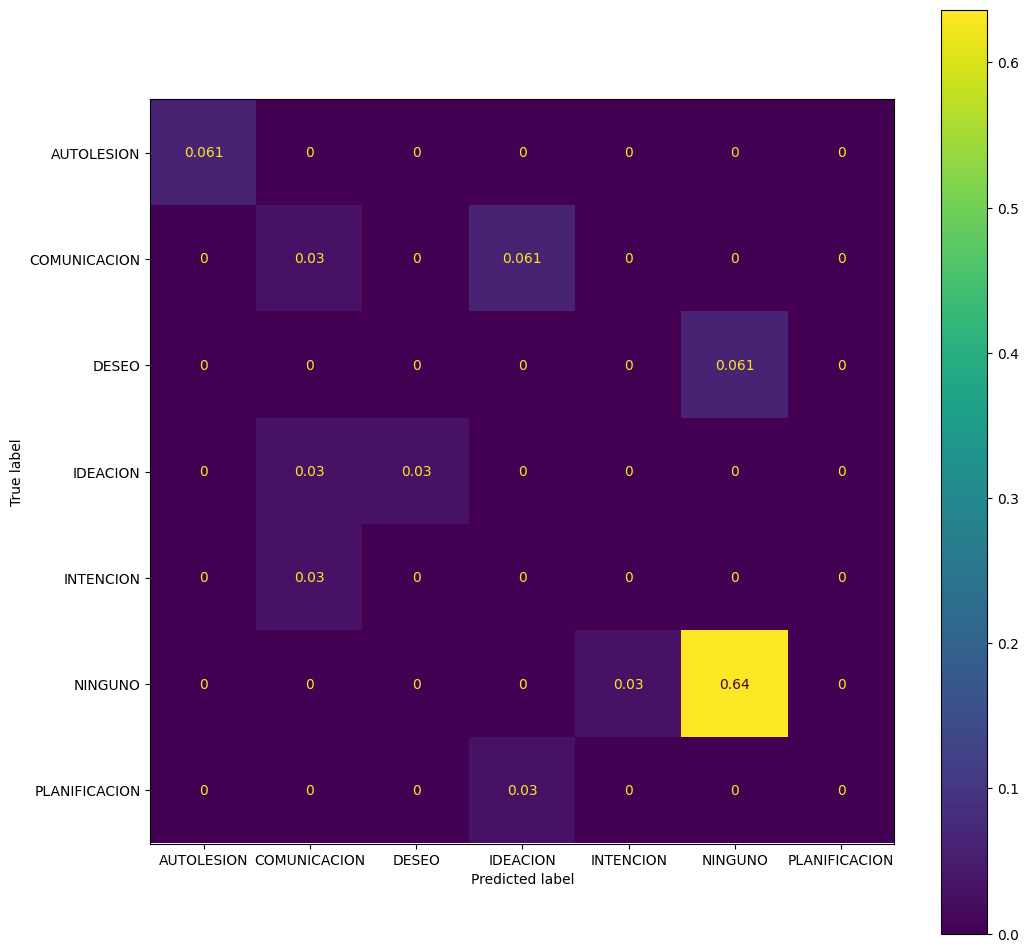

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import sys


classNames = np.unique(df['Desenlace'].to_numpy())

cm = confusion_matrix(y_test, y_pred, labels=classNames, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classNames)

#plt.figure().set_figwidth(15)
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(ax=ax)
plt.show()



## Verdaderos y falsos positivos y negativos

A continuación obtenemos el número de verdaderos/falsos positivos y verdaderos/falsos negativos de cada clase presente.

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=classNames)

def calculate_tp_fp_tn_fn(conf_matrix):
    num_classes = conf_matrix.shape[0]
    tp = np.diag(conf_matrix)
    fp = np.sum(conf_matrix, axis=0) - tp
    fn = np.sum(conf_matrix, axis=1) - tp
    tn = np.sum(conf_matrix) - (fp + fn + tp)
    #tn = []
    #for i in range(num_classes):
        #temp_conf_matrix = np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1)
        #tn.append(np.sum(temp_conf_matrix))

    return tp, fp, tn, fn

tp, fp, fn, tn = calculate_tp_fp_tn_fn(conf_matrix)

print("Verdaderos positivos totales: " + str(np.sum(tp)))
print("Falsos positivos totales: " + str(np.sum(fp)))
print("Verdaderos negativos totales: " + str(np.sum(tn)))
print("Falsos negativos totales: " + str(np.sum(fn)))
print("\n")

for i, className in enumerate(classNames):
    classnameLowered = className.lower()
    print("Verdaderos positivos "+classnameLowered+": " + str(tp[i]))
    print("Falsos positivos "+classnameLowered+": " + str(fp[i]))
    print("Verdaderos negativos "+classnameLowered+": " + str(tn[i]))
    print("Falsos negativos "+classnameLowered+": " + str(fn[i]))
    print("\n")


Verdaderos positivos totales: 24
Falsos positivos totales: 9
Verdaderos negativos totales: 9
Falsos negativos totales: 189


Verdaderos positivos autolesion: 2
Falsos positivos autolesion: 0
Verdaderos negativos autolesion: 0
Falsos negativos autolesion: 31


Verdaderos positivos comunicacion: 1
Falsos positivos comunicacion: 2
Verdaderos negativos comunicacion: 2
Falsos negativos comunicacion: 28


Verdaderos positivos deseo: 0
Falsos positivos deseo: 1
Verdaderos negativos deseo: 2
Falsos negativos deseo: 30


Verdaderos positivos ideacion: 0
Falsos positivos ideacion: 3
Verdaderos negativos ideacion: 2
Falsos negativos ideacion: 28


Verdaderos positivos intencion: 0
Falsos positivos intencion: 1
Verdaderos negativos intencion: 1
Falsos negativos intencion: 31


Verdaderos positivos ninguno: 21
Falsos positivos ninguno: 2
Verdaderos negativos ninguno: 1
Falsos negativos ninguno: 9


Verdaderos positivos planificacion: 0
Falsos positivos planificacion: 0
Verdaderos negativos planific

# Cálculo de métricas del entrenamiento

Para calcular el rendimiento del entrenamiento, se calcularán 4 métricas distintas.

* Accuracy
* Precision
* Recall
* F1

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred, average=average)
recall = recall_score(y_true=y_test, y_pred=y_pred, average=average)
f1 = f1_score(y_true=y_test, y_pred=y_pred, average=average)

print('Exactitud - Accuracy: %.3f' % accuracy)
print('Precision: %.3f' % precision)
print('Sensibilidad - Recall: %.3f' % recall)
print('F1: %.3f' % f1)

Exactitud - Accuracy: 0.727
Precision: 0.727
Sensibilidad - Recall: 0.727
F1: 0.727


# Estimación del error del entrenamiento

Para calcular la estimación del error, se utilizó la validación cruzada. 

La validación cruzada es una técnica para asegurar que el modelo entrenado se ajusta correctamente a los datos de entrenamiento y que además puede predecir correctamente datos no vistos. 

De esta manera, podemos generar una estimación más robusta del error.

En este caso, vamos a utilizar los valores por defecto. 
Se ha reemplazado el anterior método de Bootstraping de la primera versión del cuaderno de Jupyter por su falta de consistencia. 

Es decir, los valores del resultado y el error aproximado cambiaban cada vez que se volvían a ejecutar. 

In [18]:
from sklearn.model_selection import cross_validate

cv_scores = cross_validate(clf_NB, X, y, cv=5, scoring='accuracy')

# Imprimir los resultados
print("Desviación estándar de los scores:", np.std(cv_scores['test_score']))

Desviación estándar de los scores: 0.14902467720530926


c:\Users\aldai\anaconda3\envs\sivaria\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


# Guardar el modelo

Guardamos el modelo para que se puedan cargar y usar en cualquier momento.


In [19]:

from datetime import datetime

filePath = 'configFilesJupyter/autoinforme'
#filename = filePath + 'model_autoinforme.sav'

if os.path.exists(filePath) == False:
    os.mkdir(filePath)
    
data = {
    'model': clf_NB,
    'metrics': {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    },
}

now = datetime.now()
versionDateTime = now.strftime("%Y%m%d%H%M%S")
filename = filePath + '/' + 'model_autoinforme_v2_' + versionDateTime + '.sav'


# Guardamos el modelo en un archivo .pickle
pickle.dump(data, open(filename, 'wb'))